In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
CalGuide = pd.read_csv("USA_ZIP_Code_Areas_anaylsis_1822069148502459445.csv")
HHIncome2023= pd.read_csv("2023.csv")
HHIncome2020= pd.read_csv("2020.csv")
HHIncome2023.sample(5)

C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\2607979882.py:2: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  HHIncome2023= pd.read_csv("2023.csv")
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\2607979882.py:3: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  HHIncome2020= pd.read_csv("2020.csv")


,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,...,S1901_C04_012E,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M
26846,860Z200US76114,76114,9708,574,6.1,2.7,4.6,2.1,8.6,2.3,...,40893,11697,59547,8433,(X),(X),(X),(X),29.4,(X)
10798,860Z200US32763,32763,10916,632,4.9,2.1,3.4,1.6,9,3,...,34932,4015,55294,10883,(X),(X),(X),(X),41.6,(X)
20427,860Z200US58792,58792,106,46,0,20.8,12.3,16,17,14.6,...,-,**,90884,93408,(X),(X),(X),(X),87.8,(X)
18274,860Z200US53717,53717,6316,451,3.4,2.2,3.7,2.6,3.3,1.9,...,69747,13271,83614,9894,(X),(X),(X),(X),17.1,(X)
20983,860Z200US60429,60429,5116,340,13.2,8.1,1.3,1.1,3.8,1.8,...,51116,4304,57900,8672,(X),(X),(X),(X),34.9,(X)


In [15]:
CalZips = CalGuide.ZIP_Code
CalZips = CalZips.tolist()


In [16]:
HHIncome2023Cal = HHIncome2023.loc[HHIncome2023['NAME'].isin(CalZips)]
HHIncome2023Cal.sample(5)



,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,...,S1901_C04_012E,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M
30856,860Z200US91607,91607,13929,603,6.2,2.1,3.6,1.3,7.9,2.3,...,65769,10279,85971,9340,(X),(X),(X),(X),39.8,(X)
31777,860Z200US94973,94973,652,162,2.9,4.3,7.4,8.1,0,6.3,...,37125,9480,46435,20224,(X),(X),(X),(X),60.8,(X)
31551,860Z200US93950,93950,6988,207,3.5,1.2,1.1,0.5,5,1.5,...,73893,4692,92312,9604,(X),(X),(X),(X),34.5,(X)
30920,860Z200US91935,91935,2953,381,4.6,3.4,0.6,0.6,2.6,1.9,...,59444,30658,108012,42189,(X),(X),(X),(X),35.4,(X)
31042,860Z200US92252,92252,3350,373,6.3,3.2,8.3,4.5,14,4.5,...,31488,23001,63801,19888,(X),(X),(X),(X),36.6,(X)


In [17]:
HHIncome2023Cal.to_csv('calhh.csv')

# Convert the column to numeric, coercing errors to NaN
HHIncome2023Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2023Cal['S1901_C01_012E'], errors='coerce')

# Drop rows where the column is NaN (i.e., non-numeric values)
HHIncome2023Cal.dropna(subset=['S1901_C01_012E'], inplace=True)

# Convert the column back to integers
HHIncome2023Cal.loc[:, 'S1901_C01_012E'] = HHIncome2023Cal['S1901_C01_012E'].astype(int)



HHIncome2023Cal.to_csv('calhhclean.csv')

C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\1016749046.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHIncome2023Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2023Cal['S1901_C01_012E'], errors='coerce')
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\1016749046.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHIncome2023Cal.dropna(subset=['S1901_C01_012E'], inplace=True)


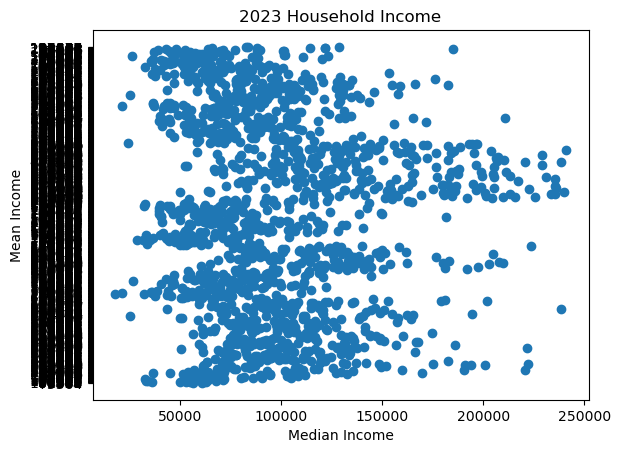

In [18]:
plt.scatter(HHIncome2023Cal.S1901_C01_012E, HHIncome2023Cal.S1901_C01_013E)

# Labels and title
plt.xlabel('Median Income')
plt.ylabel('Mean Income')
plt.title('2023 Household Income')

plt.show()

C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\2559646052.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHIncome2020Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2020Cal['S1901_C01_012E'], errors='coerce')
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\2559646052.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHIncome2020Cal.dropna(subset=['S1901_C01_012E'], inplace=True)


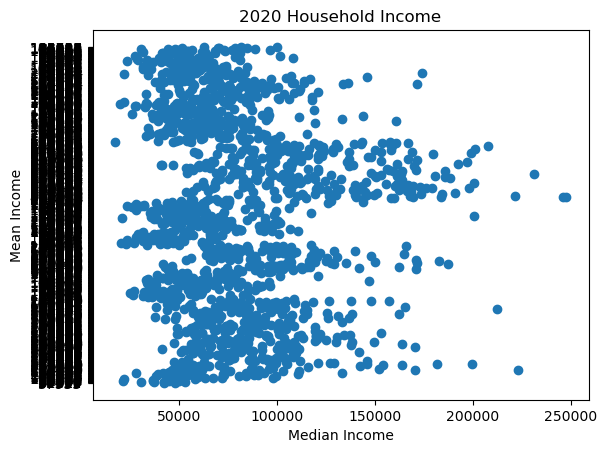

In [19]:
#Doing the same thing for 2020
HHIncome2020Cal = HHIncome2020.loc[HHIncome2020['NAME'].isin(CalZips)]
HHIncome2020Cal.sample(5)

#HHIncome2020Cal.to_csv('calhh.csv')

# Convert the column to numeric, coercing errors to NaN
HHIncome2020Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2020Cal['S1901_C01_012E'], errors='coerce')

# Drop rows where the column is NaN (i.e., non-numeric values)
HHIncome2020Cal.dropna(subset=['S1901_C01_012E'], inplace=True)

# Convert the column back to integers
HHIncome2020Cal.loc[:, 'S1901_C01_012E'] = HHIncome2020Cal['S1901_C01_012E'].astype(int)



#HHIncome2020Cal.to_csv('calhhclean.csv')

plt.scatter(HHIncome2020Cal.S1901_C01_012E, HHIncome2020Cal.S1901_C01_013E)

# Labels and title
plt.xlabel('Median Income')
plt.ylabel('Mean Income')
plt.title('2020 Household Income')

plt.show()

In [20]:
plt.scatter(HHIncome2023Cal.S1901_C01_012E - HHIncome2020Cal.S1901_C01_012E, HHIncome2023Cal.S1901_C01_013E - HHIncome2020Cal.S1901_C01_013E)

# Labels and title
plt.xlabel('Median Income')
plt.ylabel('Mean Income')
plt.title('2023-2020 Household Income')

plt.show()

#this plot is inaccurate because it doesnt account for differences in reporting zip codes for different years

TypeError: unsupported operand type(s) for -: 'str' and 'str'

ValueError: x and y must be the same size

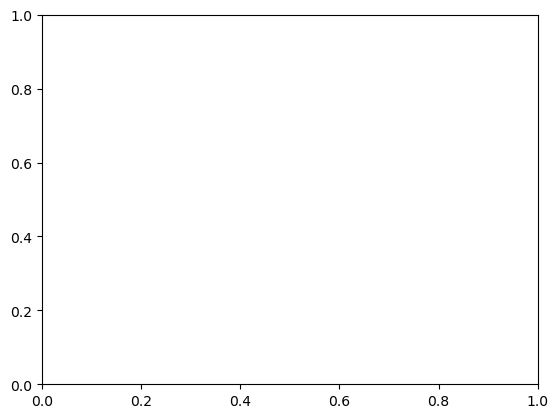

In [21]:
plt.scatter(HHIncome2020Cal.S1901_C01_012E, HHIncome2023Cal.S1901_C01_012E)

# Labels and title
plt.xlabel('2020 Median Income')
plt.ylabel('2023 Median Income')
plt.title('2020 Household Income')

plt.show()

In [22]:
HHIncome2020Cal.add_suffix('_2020')
HHIncome2023Cal.add_suffix('_2023')

,GEO_ID_2023,NAME_2023,S1901_C01_001E_2023,S1901_C01_001M_2023,S1901_C01_002E_2023,S1901_C01_002M_2023,S1901_C01_003E_2023,S1901_C01_003M_2023,S1901_C01_004E_2023,S1901_C01_004M_2023,...,S1901_C04_012E_2023,S1901_C04_012M_2023,S1901_C04_013E_2023,S1901_C04_013M_2023,S1901_C04_014E_2023,S1901_C04_014M_2023,S1901_C04_015E_2023,S1901_C04_015M_2023,S1901_C04_016E_2023,S1901_C04_016M_2023
30596,860Z200US90001,90001,13416,568,5.9,1.3,2.5,0.8,8,1.6,...,27383,6972,41329,6810,(X),(X),(X),(X),40,(X)
30597,860Z200US90002,90002,13319,438,6,1.7,8.1,1.6,9.4,1.8,...,23646,6065,36334,6304,(X),(X),(X),(X),45.9,(X)
30598,860Z200US90003,90003,17634,686,8.6,1.6,6.4,1.4,8.1,1.4,...,23949,4347,40314,5882,(X),(X),(X),(X),41.1,(X)
30599,860Z200US90004,90004,23735,778,6.1,1.1,5,1.1,7.2,1.4,...,54460,6397,82471,7848,(X),(X),(X),(X),32,(X)
30600,860Z200US90005,90005,17477,638,8.8,1.7,8.4,1.8,9.3,1.5,...,39167,4919,56810,4384,(X),(X),(X),(X),28,(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32392,860Z200US96145,96145,1372,205,3.9,3.1,2.6,2.9,4.3,4,...,77069,28481,92314,30094,(X),(X),(X),(X),7.7,(X)
32393,860Z200US96146,96146,517,108,9.3,8.4,3.1,4.8,2.9,4.3,...,82917,41953,222657,139535,(X),(X),(X),(X),10.6,(X)
32394,860Z200US96148,96148,222,84,0,17.3,0,17.3,0,17.3,...,48875,37939,64383,21031,(X),(X),(X),(X),33,(X)
32395,860Z200US96150,96150,12678,447,4,1.5,2.8,1,7.5,1.8,...,52338,5807,82419,9654,(X),(X),(X),(X),37.1,(X)


C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\3489902852.py:1: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  HHIncome2021= pd.read_csv("2021.csv")
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\3489902852.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHIncome2021Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2021Cal['S1901_C01_012E'], errors='coerce')
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\3489902852.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


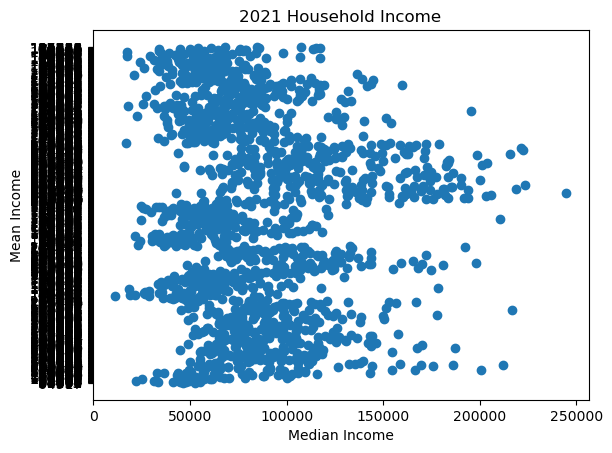

In [23]:
HHIncome2021= pd.read_csv("2021.csv")

#Doing the same thing for 2021
HHIncome2021Cal = HHIncome2021.loc[HHIncome2021['NAME'].isin(CalZips)]
HHIncome2021Cal.sample(5)

#HHIncome2021Cal.to_csv('calhh.csv')

# Convert the column to numeric, coercing errors to NaN
HHIncome2021Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2021Cal['S1901_C01_012E'], errors='coerce')

# Drop rows where the column is NaN (i.e., non-numeric values)
HHIncome2021Cal.dropna(subset=['S1901_C01_012E'], inplace=True)

# Convert the column back to integers
HHIncome2021Cal.loc[:, 'S1901_C01_012E'] = HHIncome2021Cal['S1901_C01_012E'].astype(int)


#HHIncome2021Cal.to_csv('calhhclean.csv')

plt.scatter(HHIncome2021Cal.S1901_C01_012E, HHIncome2021Cal.S1901_C01_013E)

# Labels and title
plt.xlabel('Median Income')
plt.ylabel('Mean Income')
plt.title('2021 Household Income')

plt.show()

C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\215371385.py:1: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  HHIncome2022= pd.read_csv("2022.csv")
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\215371385.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHIncome2022Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2022Cal['S1901_C01_012E'], errors='coerce')
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\215371385.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  H

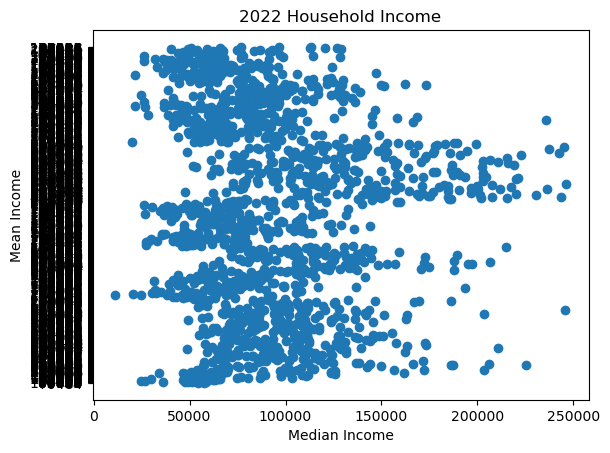

In [24]:
HHIncome2022= pd.read_csv("2022.csv")

#Doing the same thing for 2022
HHIncome2022Cal = HHIncome2022.loc[HHIncome2022['NAME'].isin(CalZips)]
HHIncome2022Cal.sample(5)

#HHIncome2022Cal.to_csv('calhh.csv')

# Convert the column to numeric, coercing errors to NaN
HHIncome2022Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2022Cal['S1901_C01_012E'], errors='coerce')

# Drop rows where the column is NaN (i.e., non-numeric values)
HHIncome2022Cal.dropna(subset=['S1901_C01_012E'], inplace=True)

# Convert the column back to integers
HHIncome2022Cal.loc[:, 'S1901_C01_012E'] = HHIncome2022Cal['S1901_C01_012E'].astype(int)



#HHIncome2022Cal.to_csv('calhhclean.csv')

plt.scatter(HHIncome2022Cal.S1901_C01_012E, HHIncome2022Cal.S1901_C01_013E)

# Labels and title
plt.xlabel('Median Income')
plt.ylabel('Mean Income')
plt.title('2022 Household Income')

plt.show()

C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\2607168898.py:1: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  HHIncome2017= pd.read_csv("2017.csv")
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\2607168898.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHIncome2017Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2017Cal['S1901_C01_012E'], errors='coerce')
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\2607168898.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


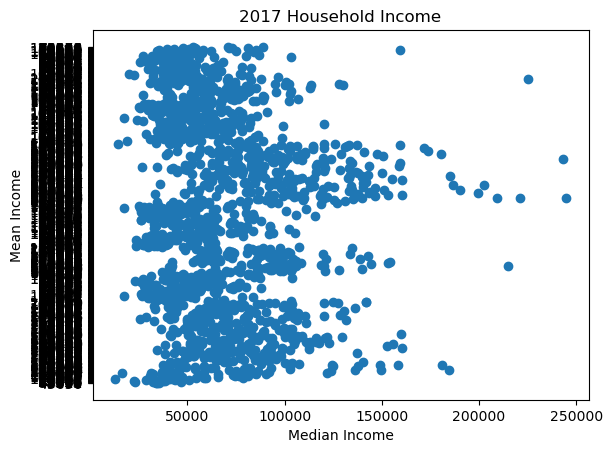

In [25]:
HHIncome2017= pd.read_csv("2017.csv")

#Doing the same thing for 2017
HHIncome2017Cal = HHIncome2017.loc[HHIncome2017['NAME'].isin(CalZips)]
HHIncome2017Cal.sample(5)

#HHIncome2017Cal.to_csv('calhh.csv')

# Convert the column to numeric, coercing errors to NaN
HHIncome2017Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2017Cal['S1901_C01_012E'], errors='coerce')

# Drop rows where the column is NaN (i.e., non-numeric values)
HHIncome2017Cal.dropna(subset=['S1901_C01_012E'], inplace=True)

# Convert the column back to integers
HHIncome2017Cal.loc[:, 'S1901_C01_012E'] = HHIncome2017Cal['S1901_C01_012E'].astype(int)


#HHIncome2017Cal.to_csv('calhhclean.csv')

plt.scatter(HHIncome2017Cal.S1901_C01_012E, HHIncome2017Cal.S1901_C01_013E)

# Labels and title
plt.xlabel('Median Income')
plt.ylabel('Mean Income')
plt.title('2017 Household Income')

plt.show()

C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\2090611230.py:1: DtypeWarning: Columns (1,2,3,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  HHIncome2018= pd.read_csv("2018.csv")
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\2090611230.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHIncome2018Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2018Cal['S1901_C01_012E'], errors='coerce')
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\2090611230.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


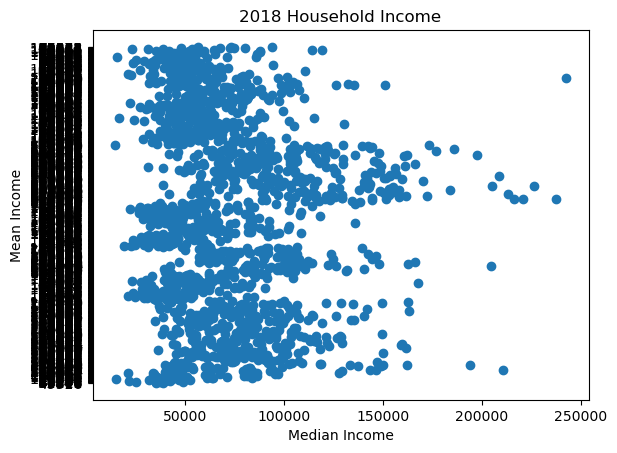

In [26]:
HHIncome2018= pd.read_csv("2018.csv")

#Doing the same thing for 2018
HHIncome2018Cal = HHIncome2018.loc[HHIncome2018['NAME'].isin(CalZips)]
HHIncome2018Cal.sample(5)

#HHIncome2018Cal.to_csv('calhh.csv')

# Convert the column to numeric, coercing errors to NaN
HHIncome2018Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2018Cal['S1901_C01_012E'], errors='coerce')

# Drop rows where the column is NaN (i.e., non-numeric values)
HHIncome2018Cal.dropna(subset=['S1901_C01_012E'], inplace=True)

# Convert the column back to integers
HHIncome2018Cal.loc[:, 'S1901_C01_012E'] = HHIncome2018Cal['S1901_C01_012E'].astype(int)


#HHIncome2018Cal.to_csv('calhhclean.csv')

plt.scatter(HHIncome2018Cal.S1901_C01_012E, HHIncome2018Cal.S1901_C01_013E)

# Labels and title
plt.xlabel('Median Income')
plt.ylabel('Mean Income')
plt.title('2018 Household Income')

plt.show()

C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\2490223134.py:1: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  HHIncome2019= pd.read_csv("2019.csv")
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\2490223134.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HHIncome2019Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2019Cal['S1901_C01_012E'], errors='coerce')
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\2490223134.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


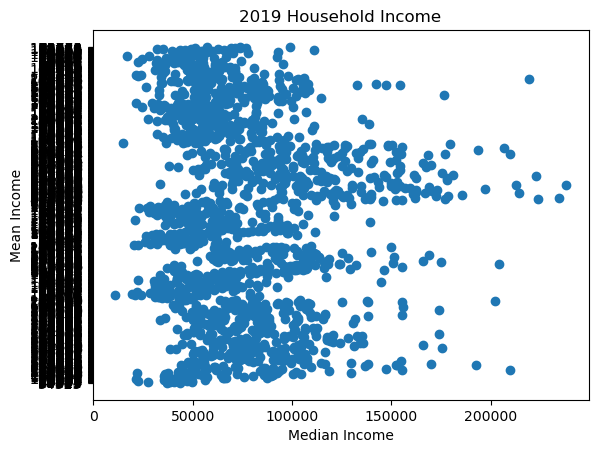

In [27]:
HHIncome2019= pd.read_csv("2019.csv")

#Doing the same thing for 2019
HHIncome2019Cal = HHIncome2019.loc[HHIncome2019['NAME'].isin(CalZips)]
HHIncome2019Cal.sample(5)

#HHIncome2019Cal.to_csv('calhh.csv')

# Convert the column to numeric, coercing errors to NaN
HHIncome2019Cal['S1901_C01_012E'] = pd.to_numeric(HHIncome2019Cal['S1901_C01_012E'], errors='coerce')

# Drop rows where the column is NaN (i.e., non-numeric values)
HHIncome2019Cal.dropna(subset=['S1901_C01_012E'], inplace=True)

# Convert the column back to integers
HHIncome2019Cal.loc[:, 'S1901_C01_012E'] = HHIncome2019Cal['S1901_C01_012E'].astype(int)


#HHIncome2019Cal.to_csv('calhhclean.csv')

plt.scatter(HHIncome2019Cal.S1901_C01_012E, HHIncome2019Cal.S1901_C01_013E)

# Labels and title
plt.xlabel('Median Income')
plt.ylabel('Mean Income')
plt.title('2019 Household Income')

plt.show()

In [28]:
#HHIncome2017Cal.add_suffix('_2017')
#HHIncome2018Cal.add_suffix('_2018')
#HHIncome2019Cal.add_suffix('_2019')
##HHIncome2020Cal.add_suffix('_2020')
#HHIncome2021Cal.add_suffix('_2021')
#HHIncome2022Cal.add_suffix('_2022')
#HHIncome2023Cal.add_suffix('_2023')

In [30]:
from functools import reduce



'''
# Put all DataFrames into a list and rename income columns
dataframes = []
for df, year in zip([HHIncome2017Cal, merged_df, HHIncome2019Cal, HHIncome2020Cal, HHIncome2021Cal, HHIncome2022Cal, HHIncome2023Cal], [2017, 2018, 2019, 2020, 2021, 2022, 2023]):
    df = df.copy()
    df.rename(columns={'S1901_C01_012E': f'Median_Income_{year}'}, inplace=True)
    df.rename(columns={'NAME': f'ZIP_{year}'}, inplace=True)
    dataframes.append(df)

# Merge all on ZIP code
merged_df = reduce(lambda left, right: pd.merge(left, right, on='ZIP', how='outer'), dataframes)

# Calculate mean income across years
income_columns = [col for col in merged_df.columns if col.startswith('Median_Income_')]
merged_df['Mean_Income'] = merged_df[income_columns].mean(axis=1)

# Output
print(merged_df)







'''

# Replace these with the paths to your datasets
file_paths = [
    'ACSST5Y2017.csv',
    'ACSST5Y2018.csv',
    'ACSST5Y2019.csv',
    'ACSST5Y2020.csv',
    'ACSST5Y2021.csv',
    'ACSST5Y2022.csv',
    'ACSST5Y2023.csv'
]

import os

file_paths = [filename.replace('ACSST5Y', '') for filename in file_paths]
'''
# Path to the folder containing the files (use '.' for current directory)
folder_path = '.'

# Loop through files in the folder
for filename in os.listdir(folder_path):
    if filename.startswith('ACSST5Y') and filename.endswith('.csv'):
        new_filename = filename.replace('ACSST5Y', '', 1)  # Remove only the first occurrence
        old_path = os.path.join(folder_path, filename)
        new_path = os.path.join(folder_path, new_filename)
        os.rename(old_path, new_path)
        print(f'Renamed: {filename} → {new_filename}')
'''
# Load datasets and rename income columns to include the year
datasets = []
for path in file_paths:
    year = path.split('_')[-1].split('.')[0]  # Extract year from filename
    df = pd.read_csv(path)
    df = df[['NAME', 'S1901_C01_012E']].copy()
    df.rename(columns={'S1901_C01_012E': f'Median_Income_{year}'}, inplace=True)
    df.rename(columns={'NAME': f'ZIP'}, inplace=True)
    datasets.append(df)
    df = df.loc[df['ZIP'].isin(CalZips)]

# Merge all datasets on ZIP code
merged_df = reduce(lambda left, right: pd.merge(left, right, on='ZIP', how='outer'), datasets)

# Calculate mean income across years
income_cols = [col for col in merged_df.columns if col.startswith('Income_')]
#merged_df['Mean_Income'] = merged_df[income_cols].mean(axis=1, skipna=True)

merged_df = merged_df.loc[merged_df['ZIP'].isin(CalZips)]



print("Merged dataset with mean income saved as 'mean_income_by_zip.csv'.")
'''
# Convert the column to numeric, coercing errors to NaN
merged_df['Median_Income_ACSST5Y2017'] = pd.to_numeric(merged_df['Median_Income_ACSST5Y2017'], errors='coerce')

# Drop rows where the column is NaN (i.e., non-numeric values)
merged_df.dropna(subset=['Median_Income_ACSST5Y2017'], inplace=True)

# Convert the column back to integers
merged_df.loc[:, 'Median_Income_ACSST5Y2017'] = merged_df['Median_Income_ACSST5Y2017'].astype(int)

# Save to new CSV
merged_df.to_csv('median_income_by_zip.csv', index=False)
'''

# Step 1: Attempt to convert all columns to numeric, coercing non-numeric to NaN
for col in merged_df.columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Step 2: Drop rows with any NaN values (rows with any invalid data in any column)
merged_df.dropna(inplace=True)

# Step 3: Convert all columns to integers (now that all NaNs are gone)
merged_df = merged_df.astype(int)



# Step 4: Save cleaned data to CSV
merged_df.to_csv('yearly_median_income_by_zip.csv', index=False)

print("Cleaned dataset saved as 'cleaned_merged_income_by_zip.csv'.")



C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\4062398801.py:63: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\4062398801.py:63: DtypeWarning: Columns (1,2,3,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\4062398801.py:63: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\4062398801.py:63: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\4062398801.py:63: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have

Merged dataset with mean income saved as 'mean_income_by_zip.csv'.
Cleaned dataset saved as 'cleaned_merged_income_by_zip.csv'.


In [31]:
# Replace these with the paths to your datasets
file_paths = [
    '2017.csv',
    '2018.csv',
    '2019.csv',
    '2020.csv',
    '2021.csv',
    '2022.csv',
    '2023.csv'
]

import os

# Load datasets and rename income columns to include the year
datasets = []
for path in file_paths:
    year = path.split('_')[-1].split('.')[0]  # Extract year from filename
    df = pd.read_csv(path)
    df = df[['NAME', 'S1901_C01_004E']].copy()
    df.rename(columns={'S1901_C01_004E': f'lowest_Income_{year}'}, inplace=True)
    df.rename(columns={'NAME': f'ZIP'}, inplace=True)
    datasets.append(df)
    df = df.loc[df['ZIP'].isin(CalZips)]

# Merge all datasets on ZIP code
merged_df = reduce(lambda left, right: pd.merge(left, right, on='ZIP', how='outer'), datasets)

# Calculate mean income across years
income_cols = [col for col in merged_df.columns if col.startswith('Income_')]
#merged_df['Mean_Income'] = merged_df[income_cols].mean(axis=1, skipna=True)

merged_df = merged_df.loc[merged_df['ZIP'].isin(CalZips)]


# Step 1: Attempt to convert all columns to numeric, coercing non-numeric to NaN
for col in merged_df.columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Step 2: Drop rows with any NaN values (rows with any invalid data in any column)
merged_df.dropna(inplace=True)

# Step 3: Convert all columns to integers (now that all NaNs are gone)
merged_df = merged_df.astype(int)

# Step 4: Save cleaned data to CSV
merged_df.to_csv('yearly_lowest_income_by_zip.csv', index=False)

print("Cleaned dataset saved as 'cleaned_merged_income_by_zip.csv'.")



C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\993432754.py:18: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\993432754.py:18: DtypeWarning: Columns (1,2,3,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\993432754.py:18: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\993432754.py:18: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
C:\Users\lucas.708\AppData\Local\Temp\ipykernel_26664\993432754.py:18: DtypeWarning: Columns (1,2,3,34,35,66,67,98,99) have mixe

Cleaned dataset saved as 'cleaned_merged_income_by_zip.csv'.
